# Visión por Computadora I - Trabajo Práctico 2
### Alumna: Noelia Qualindi | Cohorte 14 | Año 2024

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import fftpack

 # para que me imprima el graico en la misma notebook
%matplotlib inline

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para 
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada 
de Fourier

In [27]:
def create_gauss_filter(h, w, k_size=15, sigma=2):
    """
    Crea un kernel Gaussiano y su Transformada de Fourier.

    Parámetros:
    - h: Altura de la imagen
    - w: Ancho de la imagen
    - k_size: Tamaño del kernel (debe ser impar)
    - sigma: Desviación estándar de la distribución Gaussiana

    Retorna:
    - kernel: Kernel Gaussiano del mismo tamaño que la imagen con padding aplicado
    - kernel_tf: Transformada de Fourier del kernel Gaussiano
    """
    # Crear un kernel Gaussiano unidimensional y multiplicarlo por la traspuesta para obtener el 2D.
    gauss_kernel_1d = cv.getGaussianKernel(k_size, sigma)
    gauss_kernel_2d = gauss_kernel_1d @ gauss_kernel_1d.T

    # Crear una imagen vacía del tamaño deseado y ubica al kernel en el centro
    kernel = np.zeros((h, w), dtype=np.float32)
    kh, kw = gauss_kernel_2d.shape
    kernel[(h - kh) // 2:(h - kh) // 2 + kh, (w - kw) // 2:(w - kw) // 2 + kw] = gauss_kernel_2d

    # Calcular la Transformada de Fourier del kernel
    kernel_tf = np.fft.fft2(kernel)
    kernel_tf = np.fft.fftshift(kernel_tf)

    return kernel, kernel_tf

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una 
imagen para validar el funcionamiento en el dominio espectral. 


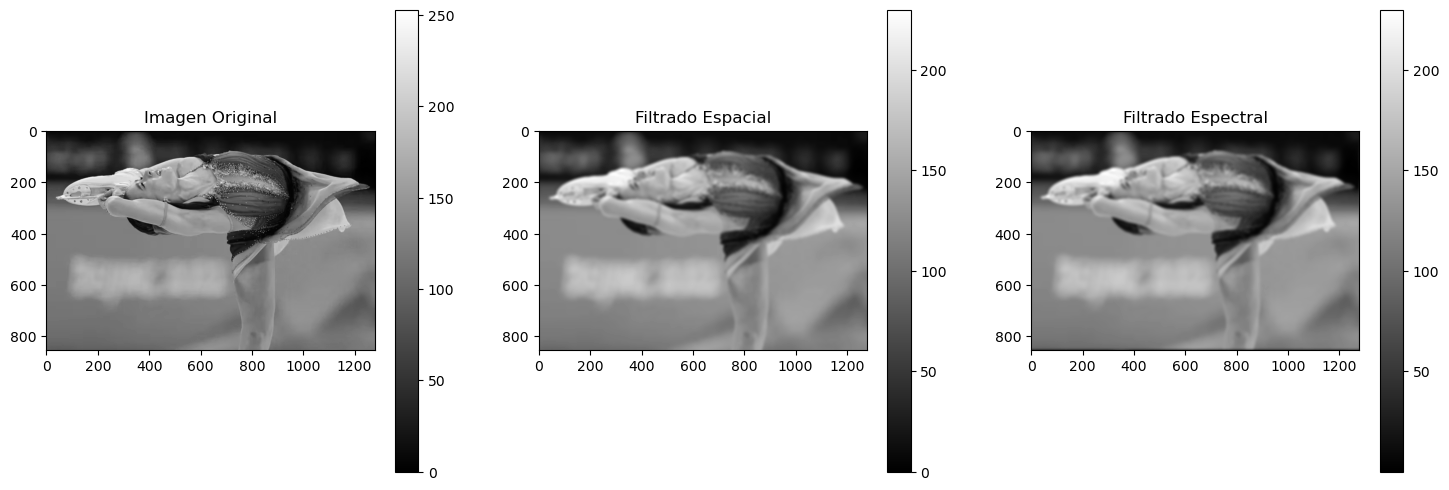

In [29]:
img_path = 'patin.png' 
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("No se pudo cargar la imagen.")

h, w = img.shape
k_size = 21
sigma = 5

# filtro gaussiano y su FFT
gauss_filter, gauss_filter_fft = create_gauss_filter(h, w, k_size, sigma)

# Filtrado en dominio espacial
filtered_img_spatial = cv.filter2D(img, -1, gauss_filter)

# Filtrado en dominio de la frecuencia 
img_fft = fftpack.fft2(img)
img_fft_shifted = fftpack.fftshift(img_fft)
filtered_img_fft = img_fft_shifted * gauss_filter_fft
filtered_img_spectral = np.abs(fftpack.ifftshift(fftpack.ifft2(fftpack.ifftshift(filtered_img_fft))))

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Filtrado Espacial')
plt.imshow(filtered_img_spatial, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Filtrado Espectral')
plt.imshow(filtered_img_spectral, cmap='gray')
plt.colorbar()

plt.show()

2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency 
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

In [30]:
# Medir la nitidez de la imagen, algoritmo descripto en el paper.
def measure_sharpness(img):
    
    F = fftpack.fft2(img) # tf de la img
    Fc = fftpack.fftshift(F) # desplaza el origen al centro
    AF = np.abs(Fc) 
    M = np.max(AF) # maximo valor
    thres = M / 1000 # umbral thres = M / 1000
    TH = np.sum(AF > thres) # cuenta el número de píxeles en AF que superan el umbral thres
    FM = TH / (img.shape[0] * img.shape[1]) # calcula la medida de nitidez
    return FM   # retorna la medida de nitidez (float)

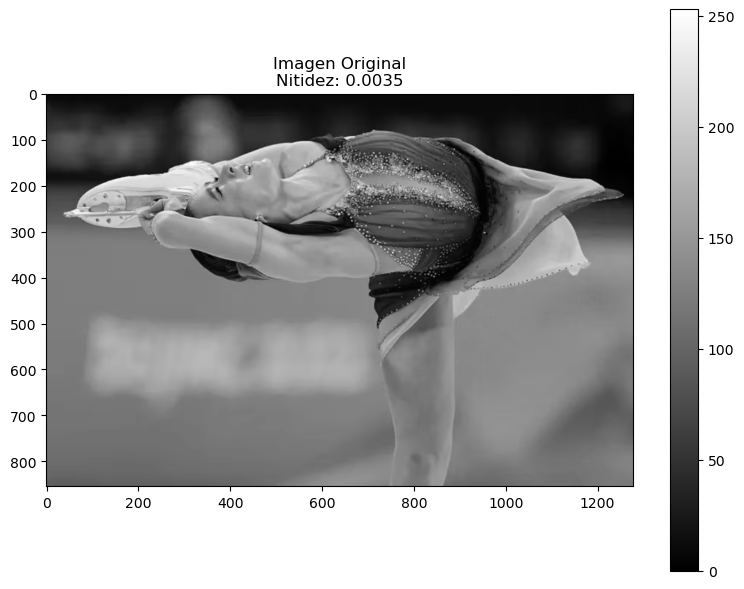

In [31]:
# Calcular la nitidez de la imagen original
measure_sharpness_filtered_original = measure_sharpness(img)

# Mostrar imagen original y su medida de nitidez
plt.figure(figsize=(8, 6))

plt.imshow(img, cmap='gray')
plt.title(f'Imagen Original\nNitidez: {measure_sharpness_filtered_original:.4f}')
plt.colorbar()

plt.tight_layout()
plt.show()

### Imágen espacial filtrada mediante convolución 

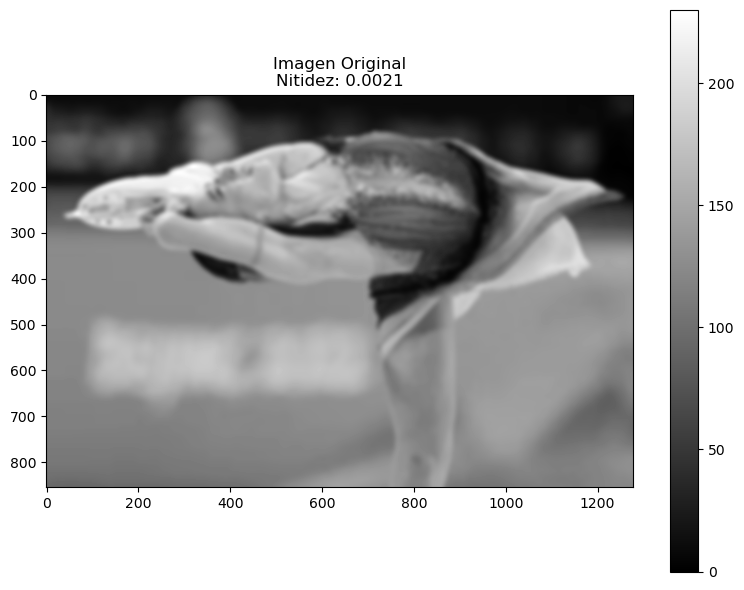

In [32]:
measure_sharpness_filtered_conv_spatial = measure_sharpness(filtered_img_spatial)

# Mostrar imagen original y su medida de nitidez
plt.figure(figsize=(8, 6))

plt.imshow(filtered_img_spatial, cmap='gray')
plt.title(f'Imagen Original\nNitidez: {measure_sharpness_filtered_conv:.4f}')
plt.colorbar()

plt.tight_layout()
plt.show()

### Filtrado de imágen con el dominio espectral

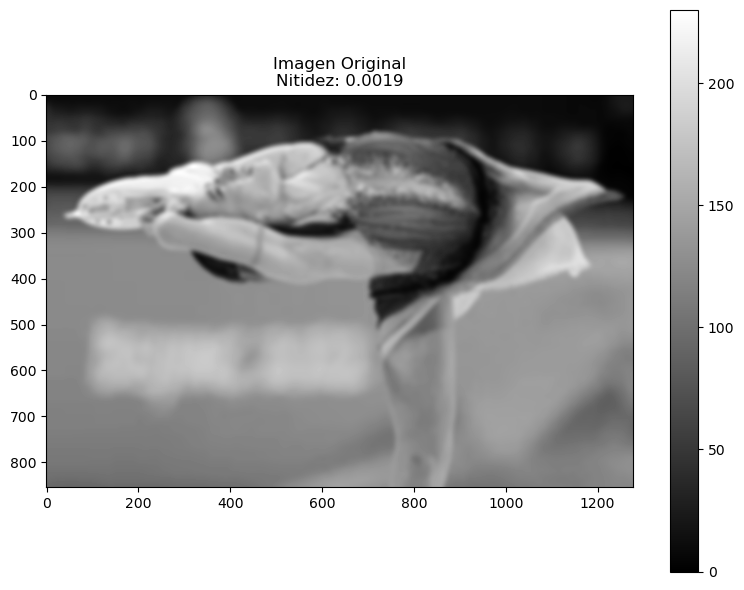

In [42]:
measure_sharpness_filtered_conv_spectral = measure_sharpness(filtered_img_spectral)

# Mostrar imagen original y su medida de nitidez
plt.figure(figsize=(8, 6))

plt.imshow(filtered_img_spatial, cmap='gray')
plt.title(f'Imagen Original\nNitidez: {measure_sharpness_filtered_conv_spectral:.4f}')
plt.colorbar()

plt.tight_layout()
plt.show()

Nitidez de la imagen original (FFT): 0.0035
Nitidez de la imagen filtrada (espacial FFT): 0.0021
Nitidez de la imagen filtrada (espectral FFT): 0.0019


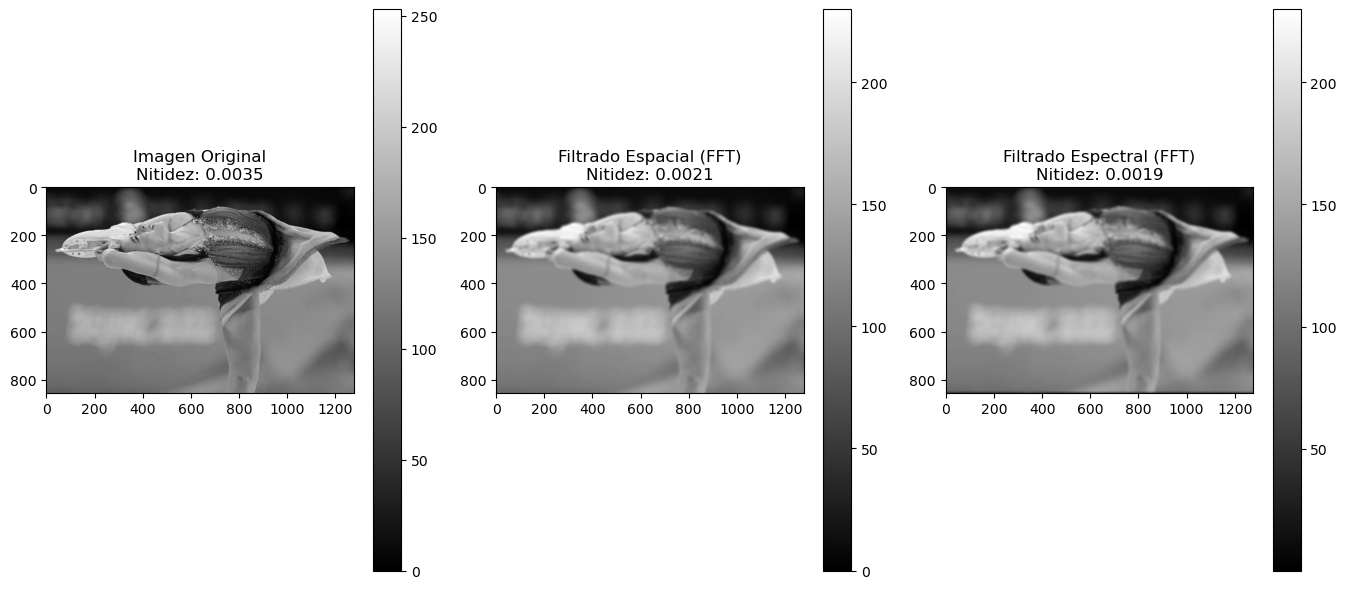

In [43]:
print(f'Nitidez de la imagen original (FFT): {measure_sharpness_filtered_original:.4f}')
print(f'Nitidez de la imagen filtrada (espacial FFT): {measure_sharpness_filtered_conv_spatial:.4f}')
print(f'Nitidez de la imagen filtrada (espectral FFT): {measure_sharpness_filtered_conv_spectral:.4f}')

# Mostrar imágenes y sus respectivas medidas de nitidez
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title(f'Imagen Original\nNitidez: {measure_sharpness_filtered_original:.4f}')
plt.imshow(img, cmap='gray')
plt.colorbar()

plt.subplot(1, 4, 2)
plt.title(f'Filtrado Espacial (FFT)\nNitidez: {measure_sharpness_filtered_conv_spatial:.4f}')
plt.imshow(filtered_img_spatial, cmap='gray')
plt.colorbar()

plt.subplot(1, 4, 3)
plt.title(f'Filtrado Espectral (FFT)\nNitidez: {measure_sharpness_filtered_conv_spectral:.4f}')
plt.imshow(filtered_img_spectral, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()


3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of 
focus measure operators in shape-from-focus”

### Tenegrad Focus Measure

Calcula el gradiente de la imagen (derivadas parciales) usando el operador de Sobel o algún otro operador similar. Luego, se calcula la magnitud del gradiente en cada píxel para determinar la nitidez.

In [47]:
def tenengrad_focus_measure(img, ksize=3): # Tenegrad es uno de los métodos descriptos en el paper.
    """
    Calcula la medida de enfoque Tenengrad de una imagen.
    
    Parámetros:
    img (ndarray): Imagen de entrada.
    ksize (int): Tamaño del kernel Sobel.
    
    Retorna:
    float: Medida de enfoque Tenengrad.
    """
    Gx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=ksize)
    Gy = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=ksize)
    FM = np.sqrt(Gx**2 + Gy**2)
    return np.mean(FM)

Tenengrad de la imagen original: 17.6551339610821
Tenengrad de la imagen filtrada (espacial): 7.714200477253116
Tenengrad de la imagen filtrada (espectral): 8.51353202701008


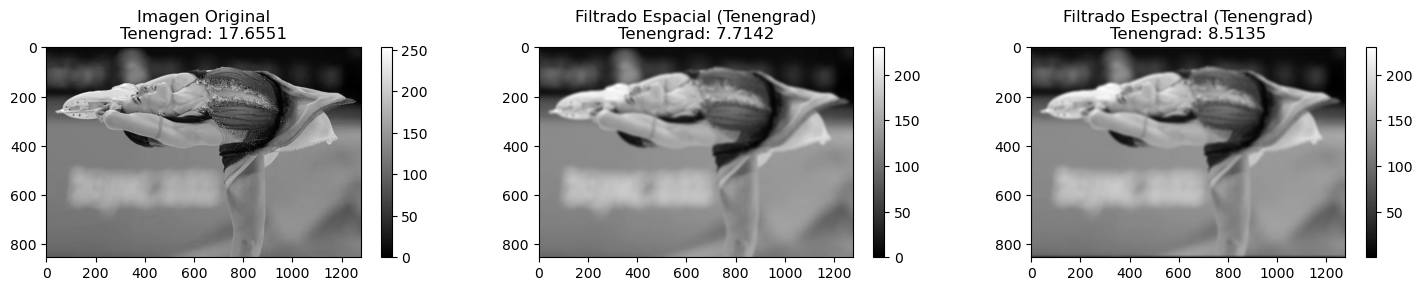

In [48]:
# Filtrado espacial y espectral para Tenengrad
tenengrad_original = tenengrad_focus_measure(img)

# nitidez de las imágenes filtradas usando Tenengrad
tenengrad_spatial = tenengrad_focus_measure(filtered_img_spatial)
tenengrad_spectral = tenengrad_focus_measure(filtered_img_spectral)

print(f'Tenengrad de la imagen original: {tenengrad_original}')
print(f'Tenengrad de la imagen filtrada (espacial): {tenengrad_spatial}')
print(f'Tenengrad de la imagen filtrada (espectral): {tenengrad_spectral}')

plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.title(f'Imagen Original\nTenengrad: {tenengrad_original:.4f}')
plt.imshow(img, cmap='gray')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.title(f'Filtrado Espacial (Tenengrad)\nTenengrad: {tenengrad_spatial:.4f}')
plt.imshow(filtered_img_spatial, cmap='gray')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.title(f'Filtrado Espectral (Tenengrad)\nTenengrad: {tenengrad_spectral:.4f}')
plt.imshow(filtered_img_spectral, cmap='gray')
plt.colorbar()
plt.show()

- En la imágen original: Un valor alto indica que la imagen original tiene buen enfoque y alta nitidez.
- En la imágen filtrada espacial: Un valor bajo sugiere que la imagen filtrada espacialmente tiene menos nitidez o está menos enfocada.
- Em la imágen filtrada espectral: Similar al caso anterior, un valor bajo indicaría que es una imagen con menos nitidez.

### Laplacian Variance Focus Measure

El filtro Laplaciano es para calcular la varianza de los valores de píxeles en la imagen. El filtro Laplaciano detecta los cambios de intensidad en una imagen, lo que ayuda a identificar bordes y áreas de alto contraste.

In [49]:
def laplacian_variance_focus_measure(img, ksize=3):
    """
    Calcula la medida de enfoque Laplacian Variance de una imagen.
    
    Parámetros:
    img (ndarray): Imagen de entrada.
    ksize (int): Tamaño del kernel Laplaciano.
    
    Retorna:
    float: Medida de enfoque Laplacian Variance.
    """
    laplacian = cv.Laplacian(img, cv.CV_64F, ksize=ksize)
    FM = np.var(laplacian)
    return FM


Laplacian Variance de la imagen original: 937.279201579263
Laplacian Variance de la imagen filtrada (espacial): 6.872872931171634
Laplacian Variance de la imagen filtrada (espectral): 12.214065014357526


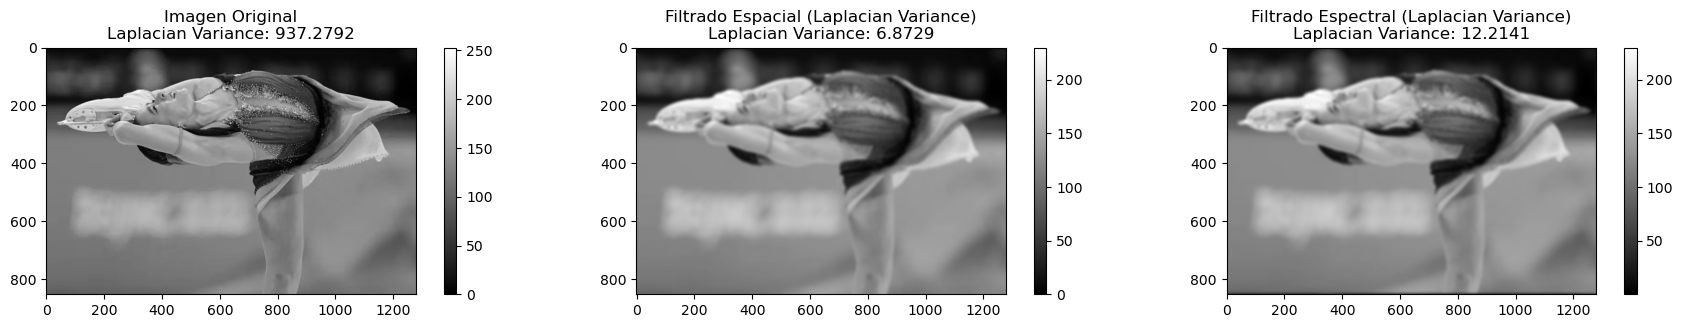

In [52]:
# Filtrado espacial y espectral para Laplacian Variance
laplacian_original = laplacian_variance_focus_measure(img)

# nitidez de las imágenes filtradas usando Laplacian Variance
laplacian_spatial = laplacian_variance_focus_measure(filtered_img_spatial)
laplacian_spectral = laplacian_variance_focus_measure(filtered_img_spectral)

print(f'Laplacian Variance de la imagen original: {laplacian_original}')
print(f'Laplacian Variance de la imagen filtrada (espacial): {laplacian_spatial}')
print(f'Laplacian Variance de la imagen filtrada (espectral): {laplacian_spectral}')

plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 4)
plt.title(f'Imagen Original\nLaplacian Variance: {laplacian_original:.4f}')
plt.imshow(img, cmap='gray')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.title(f'Filtrado Espacial (Laplacian Variance)\nLaplacian Variance: {laplacian_spatial:.4f}')
plt.imshow(filtered_img_spatial, cmap='gray')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.title(f'Filtrado Espectral (Laplacian Variance)\nLaplacian Variance: {laplacian_spectral:.4f}')
plt.imshow(filtered_img_spectral, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

- En la imágen original: Una varianza alta sugiere que hay áreas con bordes nítidos y transiciones de intensidad abruptas en la imagen original.
- En la imágen filtrada espacial: Un valor bajo indica que la imagen filtrada espacialmente es más uniforme en cuanto a intensidad, con menos cambios abruptos.
- En la imágen filtrada espectral: Similar al caso anterior, un valor bajo indica que la imagen filtrada espectralmente tiene menos cambios abruptos en la intensidad.